<a href="https://colab.research.google.com/github/derzhavin3016/CompMath/blob/master/Lab6/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя лабораторная работа №6 по вычислительной математике

Державин Андрей, Б01-909

## Задача VIII.11.3

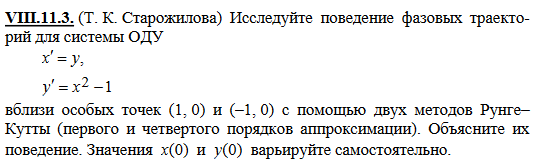

In [7]:
import numpy as np
from matplotlib import pyplot as plt

### Описание метода

Имеем систему ДУ:
$$
\frac{d \overrightarrow{u}}{dt} = f\left(t, \overrightarrow{u}\right), \:
\overrightarrow{u} = 
\left[
  \begin{matrix}
  x\\y
  \end{matrix}
\right]
$$
С начальными условиями
$$
\overrightarrow{u}(0) = \overrightarrow{u_0} = 
\left[
  \begin{matrix}
  x_0\\y_0
  \end{matrix}
\right]
$$

Для метода Рунге-Кутты 1 порядка (метод Эйлера) имеем формулу
$$
\frac{
  \overrightarrow{y_{n+1}} - \overrightarrow{y_n}
}{\tau} = 
f\left(t_n, \overrightarrow{y_n} \right) ⇔
\overrightarrow{y_{n+1}} = \overrightarrow{y_n} + 
\tau \cdot f\left(t_n, \overrightarrow{y_n} \right)
$$
Где $\overrightarrow{y}$  дискретизованное значение $\overrightarrow{u}$ по сетке

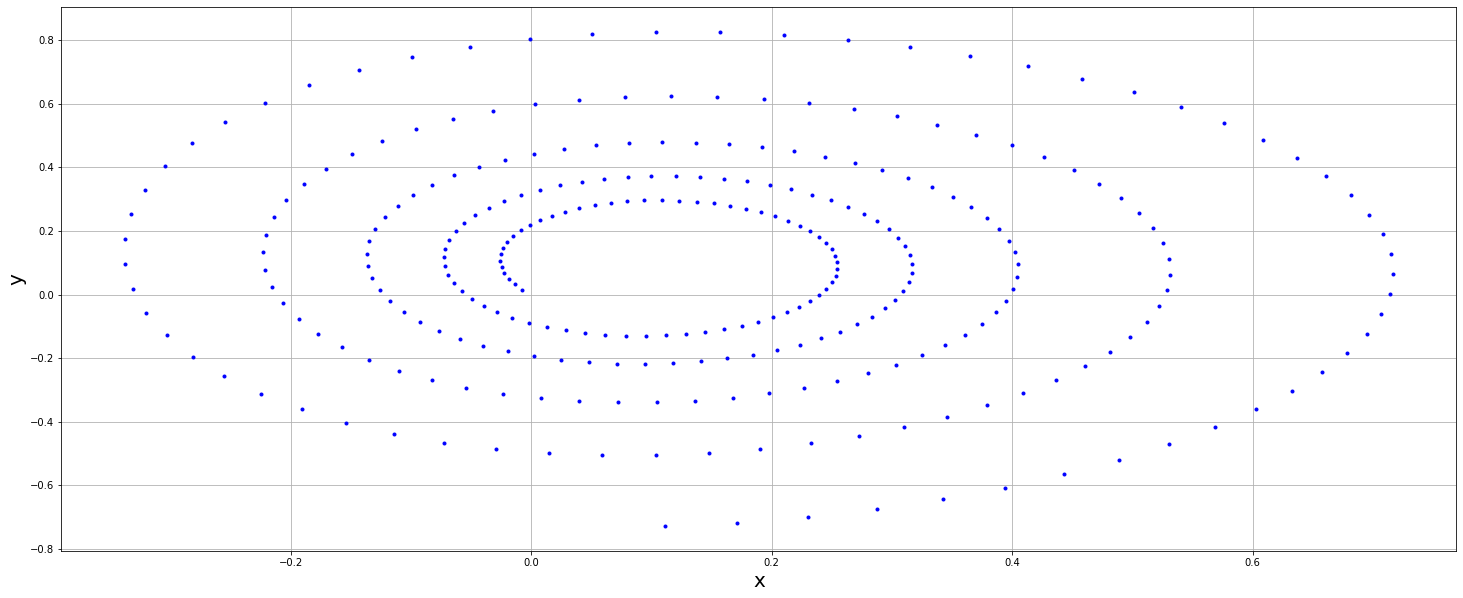

In [96]:
x_0 = -1.1
y_0 = -0.1

def f(time, u):
  return np.array([u[1], u[0]**2 - 1])

def Euler(t_end, x0, y0, nsteps):
  u_prev = np.array([x0, y0])
  u = []

  times, tau = np.linspace(0, t_end, nsteps, retstep=True)

  for t_n in times[1:]:
    u_next = u_prev + tau * f(t_n, u_prev)
    u_prev = u_next
    u.append(u_next)

  return u

def SolveNPrint(time, x0, y0, method, nsteps = 150):
  u = np.transpose(method(time, x0, y0, nsteps))

  plt.figure(figsize=[25, 10])
  plt.plot(u[0] - x0, u[1] - y0, 'b.')
  plt.xlabel('x', fontsize=20)
  plt.ylabel('y', fontsize=20)
  plt.grid()

SolveNPrint(22, x_0, y_0, Euler, 300)